In [41]:
import joblib
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import SGDClassifier

In [5]:
# Load the cleaned dataset
df = pd.read_csv("Processed_SentimentData.csv")

In [7]:
# Extract features and labels
X = df['cleaned_statement']
y = df['encoded_status']

In [9]:
# TF-IDF Vectorization
vectorizer = TfidfVectorizer(max_features=5000)  # Limit features for better performance
X_tfidf = vectorizer.fit_transform(X)

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, stratify=y, random_state=42)

In [13]:
# Train Naïve Bayes Model
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)

# Save the model and vectorizer
joblib.dump(nb_model, "naive_bayes_model.pkl")
joblib.dump(vectorizer, "tfidf_vectorizer_nb.pkl")

# Evaluate Model
y_pred = nb_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Model Accuracy: 0.6713

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.57      0.67       768
           1       0.92      0.40      0.55       556
           2       0.51      0.82      0.63      3081
           3       0.84      0.82      0.83      3269
           4       1.00      0.11      0.19       215
           5       0.88      0.10      0.18       517
           6       0.73      0.53      0.61      2131

    accuracy                           0.67     10537
   macro avg       0.81      0.48      0.52     10537
weighted avg       0.73      0.67      0.66     10537



In [17]:
# Load saved model and vectorizer
vectorizer = joblib.load("tfidf_vectorizer_nb.pkl")
nb_model = joblib.load("naive_bayes_model.pkl")

In [19]:
# Function to predict sentiment of a given text
def predict_sentiment_nb(text):
    text_tfidf = vectorizer.transform([text])  # Convert input text to TF-IDF
    prediction = nb_model.predict(text_tfidf)[0]  # Get predicted class
    return prediction

# Example Predictions
sample_texts = [
    "I feel so lost and hopeless.",
    "I'm extremely happy with my progress!",
    "Things are getting worse every day...",
    "Feeling okay, but still uncertain about the future."
]

for text in sample_texts:
    predicted_class = predict_sentiment_nb(text)
    print(f"Text: {text}\nPredicted Sentiment: {predicted_class}\n")

Text: I feel so lost and hopeless.
Predicted Sentiment: 2

Text: I'm extremely happy with my progress!
Predicted Sentiment: 2

Text: Things are getting worse every day...
Predicted Sentiment: 2

Text: Feeling okay, but still uncertain about the future.
Predicted Sentiment: 2



Naïve Bayes Accuracy: 0.6713
SVM Accuracy: 0.7651


C:\Users\abcd\AppData\Local\Temp\ipykernel_1560\1282545579.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=["Naïve Bayes", "SVM"], y=[nb_acc, svm_acc], palette="coolwarm")


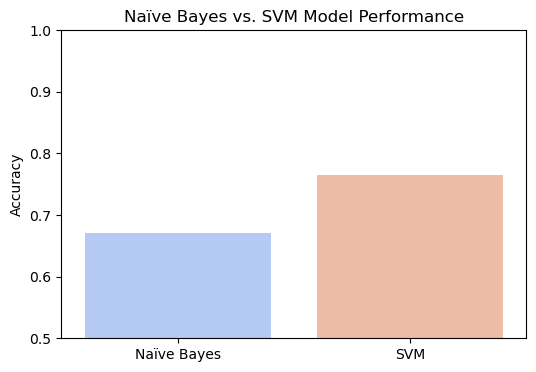

In [37]:
# Train an SVM model for comparison
svm_model = SGDClassifier(loss="hinge", max_iter=500, random_state=42)
svm_model.fit(X_train, y_train)

# Evaluate both models
nb_acc = accuracy_score(y_test, nb_model.predict(X_test))
svm_acc = accuracy_score(y_test, svm_model.predict(X_test))

print(f"Naïve Bayes Accuracy: {nb_acc:.4f}")
print(f"SVM Accuracy: {svm_acc:.4f}")

# Plot comparison
plt.figure(figsize=(6,4))
sns.barplot(x=["Naïve Bayes", "SVM"], y=[nb_acc, svm_acc], palette="coolwarm")
plt.ylim(0.5, 1)
plt.ylabel("Accuracy")
plt.title("Naïve Bayes vs. SVM Model Performance")
plt.show()

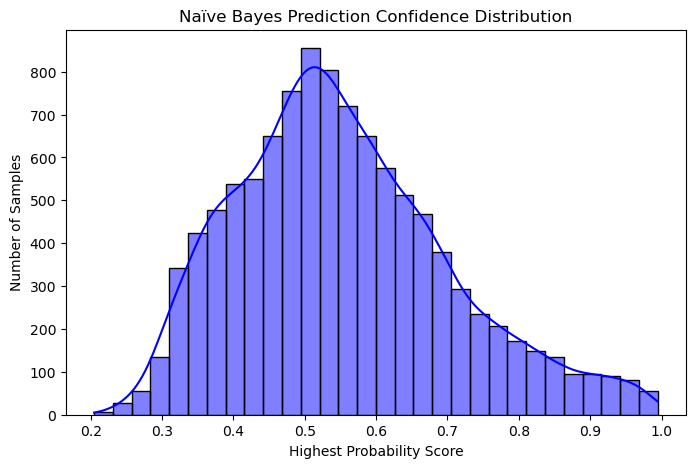

In [43]:
# Get probability scores for test samples
probabilities = nb_model.predict_proba(X_test)

plt.figure(figsize=(8, 5))
sns.histplot(np.max(probabilities, axis=1), bins=30, kde=True, color="blue")
plt.title("Naïve Bayes Prediction Confidence Distribution")
plt.xlabel("Highest Probability Score")
plt.ylabel("Number of Samples")
plt.show()


Top 15 Words for Class 0:
['for', 'restless', 'but', 'this', 'have', 'is', 'in', 'that', 'of', 'anxiety', 'it', 'the', 'to', 'my', 'and']

Top 15 Words for Class 1:
['have', 'this', 'but', 'me', 'for', 'was', 'in', 'that', 'bipolar', 'of', 'it', 'the', 'my', 'to', 'and']

Top 15 Words for Class 2:
['in', 'just', 'that', 'have', 'is', 'do', 'me', 'of', 'it', 'am', 'not', 'the', 'my', 'and', 'to']

Top 15 Words for Class 3:
['so', 'are', 'don', 'what', 'in', 'for', 'of', 'my', 'and', 'that', 'is', 'it', 'to', 'the', 'you']

Top 15 Words for Class 4:
['you', 'people', 'don', 'but', 'like', 'in', 'that', 'me', 'avpd', 'my', 'of', 'it', 'the', 'and', 'to']

Top 15 Words for Class 5:
['have', 'but', 'this', 'for', 'that', 'he', 'in', 'me', 'of', 'stress', 'it', 'my', 'the', 'to', 'and']

Top 15 Words for Class 6:
['that', 'want', 'just', 'of', 'have', 'is', 'me', 'it', 'do', 'the', 'my', 'not', 'am', 'and', 'to']


C:\Users\abcd\AppData\Local\Temp\ipykernel_1560\1877997275.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=[feature_names[i] for i in top_indices], y=importance[top_indices], palette="coolwarm")


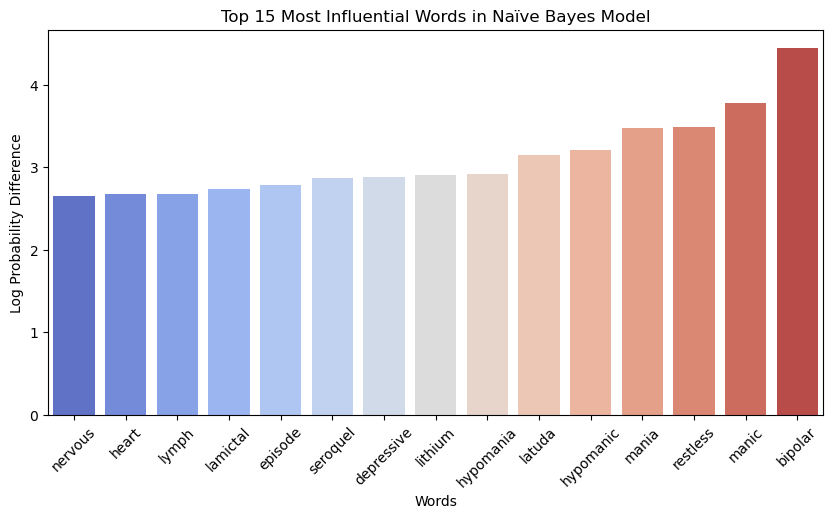

In [45]:
# Extract feature importance using Naïve Bayes log probabilities
feature_names = vectorizer.get_feature_names_out()
class_log_prob = nb_model.feature_log_prob_  # Log probabilities per class
top_n = 15  # Select top 15 words

# Get most important words per class
for i, class_label in enumerate(nb_model.classes_):
    indices = np.argsort(class_log_prob[i])[-top_n:]  # Get top N words
    print(f"\nTop 15 Words for Class {class_label}:")
    print([feature_names[j] for j in indices])

# Visualizing the feature importance for the most influential words
importance = np.abs(class_log_prob[1] - class_log_prob[0])  # Importance of words in classification
top_indices = np.argsort(importance)[-top_n:]

plt.figure(figsize=(10,5))
sns.barplot(x=[feature_names[i] for i in top_indices], y=importance[top_indices], palette="coolwarm")
plt.xticks(rotation=45)
plt.xlabel("Words")
plt.ylabel("Log Probability Difference")
plt.title("Top 15 Most Influential Words in Naïve Bayes Model")
plt.show()

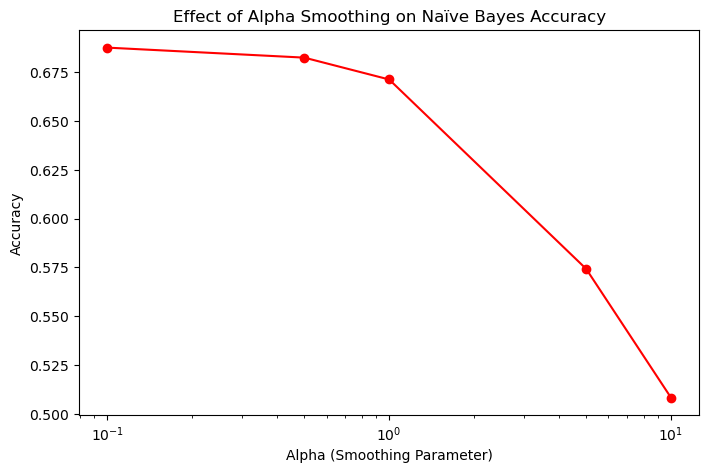

In [47]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

alpha_values = [0.1, 0.5, 1, 5, 10]
accuracies = []

for alpha in alpha_values:
    nb = MultinomialNB(alpha=alpha)
    nb.fit(X_train, y_train)
    acc = accuracy_score(y_test, nb.predict(X_test))
    accuracies.append(acc)

plt.figure(figsize=(8, 5))
plt.plot(alpha_values, accuracies, marker="o", linestyle="-", color="red")
plt.xlabel("Alpha (Smoothing Parameter)")
plt.ylabel("Accuracy")
plt.title("Effect of Alpha Smoothing on Naïve Bayes Accuracy")
plt.xscale("log")  # Log scale for better visualization
plt.show()

In [49]:
print("Class Priors (Before Training):", np.exp(nb_model.class_log_prior_))

Class Priors (Before Training): [0.07291667 0.05270027 0.29240224 0.3102221  0.02045368 0.04911731
 0.20218774]
